In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/guardian-environment-related-news/guardian_environment_news.csv


In [2]:
import pandas as pd

In [6]:
df = pd.read_csv('/kaggle/input/guardian-environment-related-news/guardian_environment_news.csv')

In [7]:
df.head()

,Title,Intro Text,Authors,Article Text,Date Published
0,Liz Truss ‘will approve more oil drilling if ...,Tory leadership candidate criticised by campai...,"['Rob Davies', '@ByRobDavies']",Liz Truss will sign off on a push for more oil...,2022-08-30
1,Renewed Highland golf course plan has environm...,Scottish government rejected a new links at Co...,"['Ewan Murray', '@mrewanmurray']",It is an area so tranquil that the notion of b...,2021-03-22
2,Visiting green spaces deters mental health dr...,Positive effects were stronger among those rep...,"['Damien Gayle', '@damiengayle']","Visits to parks, community gardens and other u...",2023-01-17
3,Bought too much red cabbage? Turn it into a fe...,This fantastic vegan centrepiece makes full us...,['Tom Hunt'],"I devised today’s nut roast for Oddbox, a veg ...",2023-12-22
4,‘This year has been very good’: readers’ UK bu...,Readers share their favourite sightings over t...,['Guardian readers'],‘Constant companions to our gardening’A peacoc...,2023-12-19


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30059 entries, 0 to 30058
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           29111 non-null  object
 1   Intro Text      29977 non-null  object
 2   Authors         25489 non-null  object
 3   Article Text    29691 non-null  object
 4   Date Published  27618 non-null  object
dtypes: object(5)
memory usage: 1.1+ MB


In [9]:
# Data Cleaning

In [23]:
import pandas as pd

# Assuming you have already loaded your dataset into a DataFrame named 'df'
# Make sure to replace 'path_to_your_dataset.csv' with the actual path to your dataset file
df = pd.read_csv('/kaggle/input/guardian-environment-related-news/guardian_environment_news.csv')

# Correctly convert 'date published' to datetime format
df['Date Published'] = pd.to_datetime(df['Date Published'])

# Check for and handle missing values in 'article_text' and 'date published'
df = df.dropna(subset=['Article Text', 'Date Published'])

In [25]:
# Sentiment Analysis

In [24]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply the function to your articles
df['sentiment'] = df['Article Text'].apply(calculate_sentiment)

In [28]:
# identify the most frequent keywords

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Optional custom tokenizer for advanced control (use if needed)
def process_text(text):
    tokens = word_tokenize(text)
    return [word for word in tokens if word.isalpha()]  # Only keep alphabetic words

# Apply TF-IDF Vectorizer with stopword removal within the vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')  # Remove stopwords here

# Optionally use a custom tokenizer if needed for specific requirements
# tfidf_vectorizer = TfidfVectorizer(tokenizer=process_text, stop_words=None)

tfidf_matrix = tfidf_vectorizer.fit_transform(df['Article Text'])
feature_names = tfidf_vectorizer.get_feature_names_out()

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
# Group by year and calculate average sentiment
df['year'] = df['Date Published'].dt.year
yearly_sentiment = df.groupby('year')['sentiment'].mean()

# For keywords, you might need to analyze each year's data separately using the approach outlined above

In [ ]:
# Visualization

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


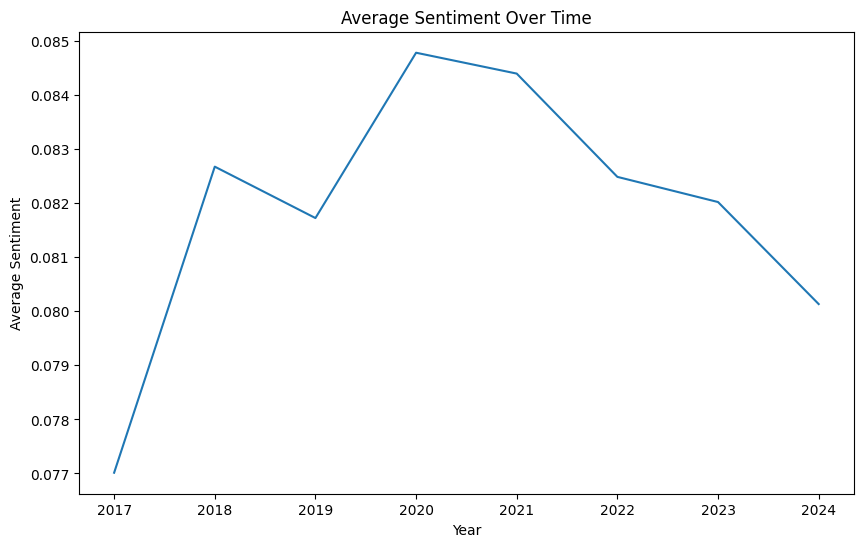

In [37]:
# Assuming 'yearly_sentiment' contains sentiment data per year

# Sentiment over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_sentiment)
plt.title('Average Sentiment Over Time')
plt.ylabel('Average Sentiment')
plt.xlabel('Year')
plt.show()

In [41]:
# Extract Keywords Using TF-IDF

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [45]:
# Fill NaN values in 'article_text' with empty strings
df['Article Text'] = df['Article Text'].fillna('')

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.85, stop_words='english', max_features=10000)

In [47]:
# Fit and transform the 'article_text' column
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Article Text'])

# Get feature names to use as keywords
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

In [48]:
# Function to get top N keywords for each row
def get_top_n_keywords(row_data, feature_names, top_n=5):
    # Sort indices of row data by their corresponding values in descending order
    sorted_indices = np.argsort(row_data.toarray()).flatten()[::-1]
    # Get top N feature names for the row
    top_feature_names = feature_names[sorted_indices[:top_n]]
    return list(top_feature_names)

In [49]:
# Apply the function to each row in the TF-IDF matrix
df['keywords'] = [get_top_n_keywords(row, feature_names) for row in tfidf_matrix]

In [ ]:
# Aggregating Keywords by Year

In [50]:
from collections import Counter

# Assuming 'keywords' is a list of keywords for each article
# First, ensure keywords are in a form that can be easily aggregated (a list of strings)
# If your keywords are not already in this form, adjust the preprocessing as necessary

# Aggregate keywords by year
keywords_by_year = df.groupby('year')['keywords'].sum()

# Count the frequency of each keyword by year
keyword_counts_by_year = {year: Counter(keywords) for year, keywords in keywords_by_year.items()}

In [ ]:
# Creating Bar Plots for Keywords

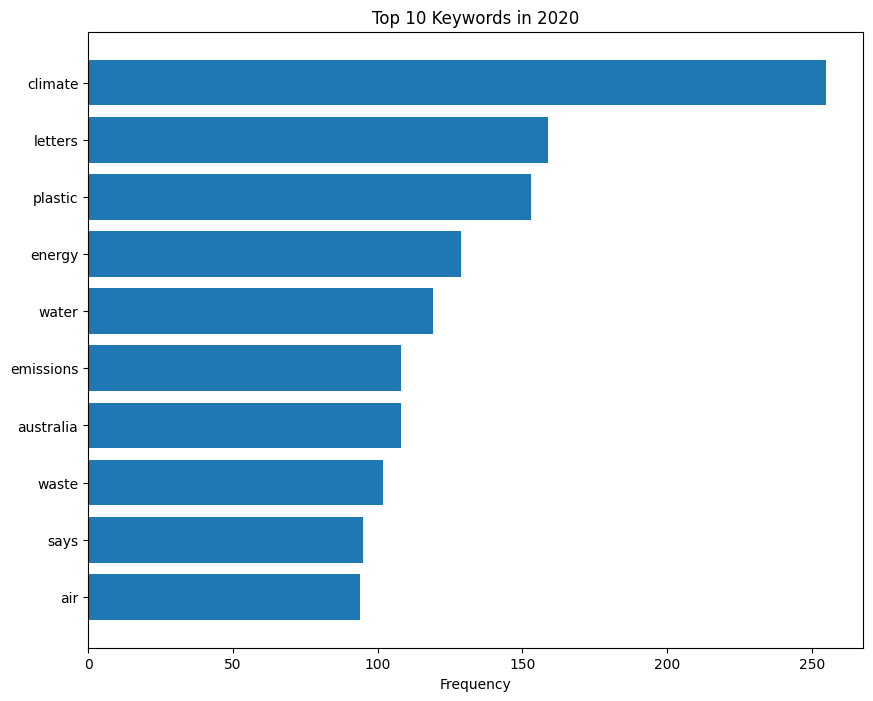

In [51]:
import matplotlib.pyplot as plt

selected_year = 2020  # Example year
top_n = 10  # Number of top keywords to display

# Get the top N keywords for the selected year
top_keywords = keyword_counts_by_year[selected_year].most_common(top_n)
keywords, frequencies = zip(*top_keywords)

# Create a bar plot
plt.figure(figsize=(10, 8))
plt.barh(keywords, frequencies)
plt.xlabel('Frequency')
plt.title(f'Top {top_n} Keywords in {selected_year}')
plt.gca().invert_yaxis()  # To display the keyword with the highest frequency on top
plt.show()

In [54]:
# Creating Word Clouds for Keywords

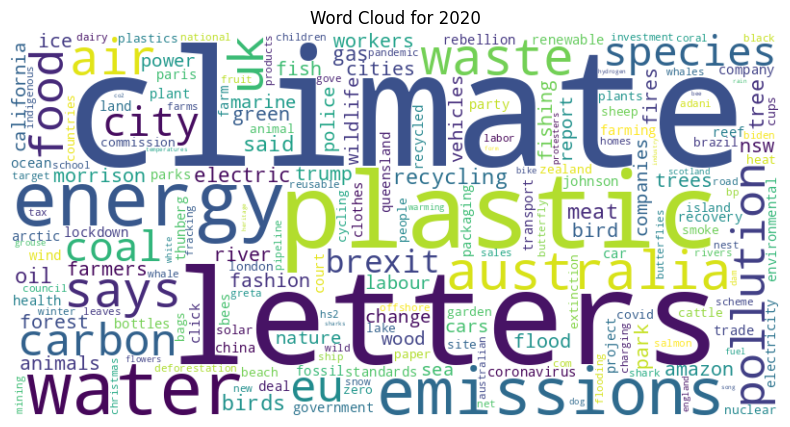

In [56]:
from wordcloud import WordCloud

selected_year = 2020  # Example year

# Generate a word cloud for the selected year
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(keyword_counts_by_year[selected_year])

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title(f'Word Cloud for {selected_year}')
plt.show()